# Libraries imports:

In [273]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [274]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Dataset Overview:

In [275]:
df = pd.read_csv('HRDataset.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [276]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

In [277]:
df.shape

(54808, 13)

In [278]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


# Data Cleaning:

In [279]:
df['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [280]:
df['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [281]:
df.drop(['employee_id','region','recruitment_channel'],axis=1 ,inplace= True)

In [282]:
df.rename(columns={'awards_won?':'awards_won'}, inplace = True)

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   education             52399 non-null  object 
 2   gender                54808 non-null  object 
 3   no_of_trainings       54808 non-null  int64  
 4   age                   54808 non-null  int64  
 5   previous_year_rating  50684 non-null  float64
 6   length_of_service     54808 non-null  int64  
 7   awards_won            54808 non-null  int64  
 8   avg_training_score    54808 non-null  int64  
 9   is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 4.2+ MB


In [284]:
df.isna().sum()

department                 0
education               2409
gender                     0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

In [285]:
df.dropna(subset=['education' , 'previous_year_rating'], inplace=True)

In [286]:
df.isna().sum()

department              0
education               0
gender                  0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

In [287]:
sum(df.duplicated())

5332

In [288]:
df.drop_duplicates(inplace=True) #drop duplicated rows

In [289]:
df.isna().sum()

department              0
education               0
gender                  0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

# Exploring Data:

In [290]:
df.corr()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
no_of_trainings,1.000000,-0.103133,-0.061732,-0.068187,-0.014052,0.034198,-0.035479
age,-0.103133,1.000000,0.006142,0.613598,-0.020005,-0.077353,-0.040103
previous_year_rating,-0.061732,0.006142,1.000000,-0.001156,0.030566,0.073300,0.167893
length_of_service,-0.068187,0.613598,-0.001156,1.000000,-0.051316,-0.053756,-0.026117
awards_won,-0.014052,-0.020005,0.030566,-0.051316,1.000000,0.073407,0.194361
avg_training_score,0.034198,-0.077353,0.073300,-0.053756,0.073407,1.000000,0.182227
is_promoted,-0.035479,-0.040103,0.167893,-0.026117,0.194361,0.182227,1.000000


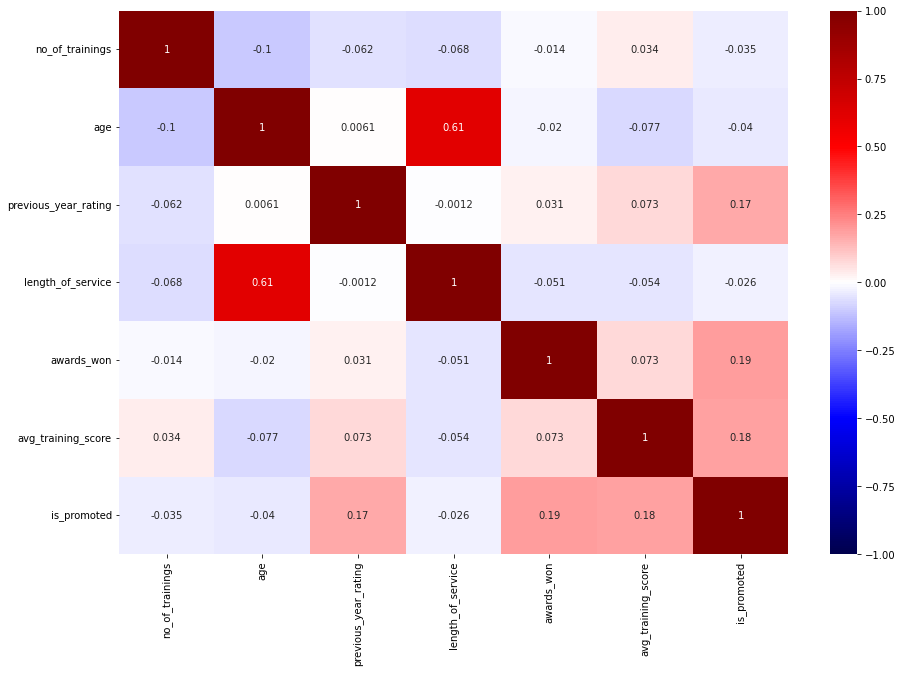

In [291]:
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [292]:
#parchart for Education

In [293]:
#parchart for Department

# Pre-proccessing:

In [294]:
df = pd.get_dummies(df) #convert all categorical data to numeric
df

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m
0,1,35,5.0,8,0,49,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,1,30,5.0,4,0,60,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,1,34,3.0,7,0,50,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,2,39,1.0,10,0,50,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,1,45,3.0,2,0,73,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,2,31,1.0,2,0,49,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
54803,1,48,3.0,17,0,78,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
54804,1,37,2.0,6,0,56,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
54805,1,27,5.0,3,0,79,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43328 entries, 0 to 54807
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               43328 non-null  int64  
 1   age                           43328 non-null  int64  
 2   previous_year_rating          43328 non-null  float64
 3   length_of_service             43328 non-null  int64  
 4   awards_won                    43328 non-null  int64  
 5   avg_training_score            43328 non-null  int64  
 6   is_promoted                   43328 non-null  int64  
 7   department_Analytics          43328 non-null  uint8  
 8   department_Finance            43328 non-null  uint8  
 9   department_HR                 43328 non-null  uint8  
 10  department_Legal              43328 non-null  uint8  
 11  department_Operations         43328 non-null  uint8  
 12  department_Procurement        43328 non-null  uint8  
 13  d

# Split X & Y

In [296]:
X, y = df.drop('is_promoted',axis=1), df['is_promoted']

In [297]:
X

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m
0,1,35,5.0,8,0,49,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1,1,30,5.0,4,0,60,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2,1,34,3.0,7,0,50,0,0,0,0,0,0,0,1,0,1,0,0,0,1
3,2,39,1.0,10,0,50,0,0,0,0,0,0,0,1,0,1,0,0,0,1
4,1,45,3.0,2,0,73,0,0,0,0,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,2,31,1.0,2,0,49,0,0,0,0,0,0,0,1,0,1,0,0,0,1
54803,1,48,3.0,17,0,78,0,0,0,0,0,0,0,0,1,1,0,0,0,1
54804,1,37,2.0,6,0,56,0,0,0,0,1,0,0,0,0,0,0,1,1,0
54805,1,27,5.0,3,0,79,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [298]:
y

0        0
1        0
2        0
3        0
4        0
        ..
54802    0
54803    0
54804    0
54805    0
54807    0
Name: is_promoted, Length: 43328, dtype: int64

In [299]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [300]:
X_train.isna().sum()

no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
awards_won                      0
avg_training_score              0
department_Analytics            0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
education_Bachelor's            0
education_Below Secondary       0
education_Master's & above      0
gender_f                        0
gender_m                        0
dtype: int64

# imbalance data:

In [301]:
y_train.value_counts() #impalance

0    31365
1     3297
Name: is_promoted, dtype: int64

# fix the impalance data

In [302]:
pip install imblearn


Note: you may need to restart the kernel to use updated packages.


In [303]:
from imblearn.over_sampling import SMOTE


In [304]:
# X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)

oversample = SMOTE() 
X_train_smote, y_train_smote = oversample.fit_resample(X_train.astype('float'),y_train)

In [305]:
y_train_smote.value_counts()

0    31365
1    31365
Name: is_promoted, dtype: int64

# scalling data

In [306]:
# scalling data to improve the model performance 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

# SVC

In [340]:
from sklearn.svm import SVC
svc = SVC(C = 10, gamma = 0.01)
svc.fit(X_train_smote, y_train_smote)

SVC(C=10, gamma=0.01)

In [341]:
# model predictions 

y_pred = svc.predict(X_test)

In [342]:
# accuracy score

print(accuracy_score(y_train_smote, svc.predict(X_train_smote)))

svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

0.8486051331101546
0.8948765289637665


In [343]:
print(confusion_matrix(y_test, y_pred))

[[7412  366]
 [ 545  343]]


# SGD

In [344]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
parameters = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1],
    'loss' : ['hinge', 'log'],
    'penalty' : ['l1', 'l2']
}

grid_search = GridSearchCV(sgd, parameters, cv = 10, n_jobs = -1)
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=10, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ['hinge', 'log'], 'penalty': ['l1', 'l2']})

In [345]:
# best parameter 

grid_search.best_params_

{'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l2'}

In [346]:
sgd = SGDClassifier(alpha = 0.001, loss = 'hinge', penalty = 'l1')
sgd.fit(X_train_smote, y_train_smote)

SGDClassifier(alpha=0.001, penalty='l1')

In [347]:
# model predictions 

y_pred = sgd.predict(X_test)

In [348]:
# accuracy score

print(accuracy_score(y_train_smote, sgd.predict(X_train_smote)))

sgd_acc = accuracy_score(y_test, sgd.predict(X_test))
print(sgd_acc)

0.731021839630161
0.7606738979921532


In [349]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[6042 1736]
 [ 338  550]]


# Destion tree

In [307]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 28, min_samples_leaf = 1, min_samples_split = 8, splitter = 'random')
dtc.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=8,
                       splitter='random')

In [308]:
y_pred = dtc.predict(X_test)

In [309]:
# accuracy score

print(accuracy_score(y_train_smote, dtc.predict(X_train_smote)))

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)

0.9302725968436155
0.8936072005538888


In [310]:
 # confusion matrix

print(confusion_matrix(y_test, y_pred))

[[7409  369]
 [ 553  335]]


In [311]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7778
           1       0.48      0.38      0.42       888

    accuracy                           0.89      8666
   macro avg       0.70      0.66      0.68      8666
weighted avg       0.88      0.89      0.89      8666



# Random Forest

In [312]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)

In [313]:
y_pred = rand_clf.predict(X_test)

In [314]:
# accuracy score

print(accuracy_score(y_train_smote, rand_clf.predict(X_train_smote)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.9116690578670492
0.8975305792753289


In [315]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[7462  316]
 [ 572  316]]


# voting 

In [318]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
classifiers = [('Logistic Regression', log_reg), ('K Nearest Neighbours', knn), ('Support Vector Classifier', svc),
               ('Decision Tree', dtc)]

vc = VotingClassifier(estimators = classifiers)

vc.fit(X_train_smote, y_train_smote)

VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('K Nearest Neighbours', KNeighborsClassifier()),
                             ('Support Vector Classifier',
                              SVC(C=10, gamma=0.01)),
                             ('Decision Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=28,
                                                     min_samples_split=8,
                                                     splitter='random'))])

In [319]:
y_pred = vc.predict(X_test)

In [320]:
# accuracy score

print(accuracy_score(y_train_smote, vc.predict(X_train_smote)))

vc_acc = accuracy_score(y_test, y_pred)
print(vc_acc)

0.8781763111748765
0.9043387952919455


In [321]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[7516  262]
 [ 567  321]]


# ADA

In [322]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

ada = AdaBoostClassifier(dtc, n_estimators = 180)
ada.fit(X_train_smote, y_train_smote)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=28,
                                                         min_samples_split=8,
                                                         splitter='random'),
                   n_estimators=180)

In [323]:
y_pred = ada.predict(X_test)

In [324]:
# accuracy score

print(accuracy_score(y_train_smote, ada.predict(X_train_smote)))

ada_acc = accuracy_score(y_test, y_pred)
print(ada_acc)

0.9945002391200383
0.8961458573736442


In [325]:
print(confusion_matrix(y_test, y_pred))


[[7478  300]
 [ 600  288]]


# Gradient Boosting Classifier¶


In [326]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [327]:
# best parameters 

grid_search_gbc.best_params_

{'learning_rate': 1, 'loss': 'deviance', 'n_estimators': 180}

In [328]:
gbc = GradientBoostingClassifier(learning_rate = 1, loss = 'deviance', n_estimators = 180)
gbc.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(learning_rate=1, n_estimators=180)

In [329]:
y_pred = gbc.predict(X_test)

In [330]:
# accuracy score

print(accuracy_score(y_train_smote, gbc.predict(X_train_smote)))

gbc_acc = accuracy_score(y_test, y_pred)
print(gbc_acc)

0.966268133269568
0.927532887145165


In [331]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[7720   58]
 [ 570  318]]


In [332]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7778
           1       0.85      0.36      0.50       888

    accuracy                           0.93      8666
   macro avg       0.89      0.68      0.73      8666
weighted avg       0.92      0.93      0.91      8666



# SGD

In [333]:
sgbc = GradientBoostingClassifier(max_depth=4, subsample=0.9, max_features=0.75, n_estimators=180, random_state=0)

sgbc.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(max_depth=4, max_features=0.75, n_estimators=180,
                           random_state=0, subsample=0.9)

In [334]:
y_pred = sgbc.predict(X_test)

In [335]:
# accuracy score

print(accuracy_score(y_train_smote, sgbc.predict(X_train_smote)))

sgbc_acc = accuracy_score(y_test, y_pred)
print(sgbc_acc)

0.9463255220787502
0.9237249019155319


In [336]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[7695   83]
 [ 578  310]]
